## ２次関数のフィッティング

二次関数の点群を与えて、元の関数を予測させる。

具体的な関数の形は与えないで、ニューラルネットワークをモデルとして使う。

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch

N = 100 # 入力層のデータ数
M = 500 # 隠れ層の次元

np.random.seed(123)
x = np.random.randn(N)
y = x ** 2 + np.random.randn(N) * 0.1

x = torch.tensor(x).view(-1, 1).float()
y = torch.tensor(y).view(-1, 1).float()

x_train = x[:N // 2]
x_test  = x[N // 2:]
y_train = y[:N // 2]
y_test  = y[N // 2:]


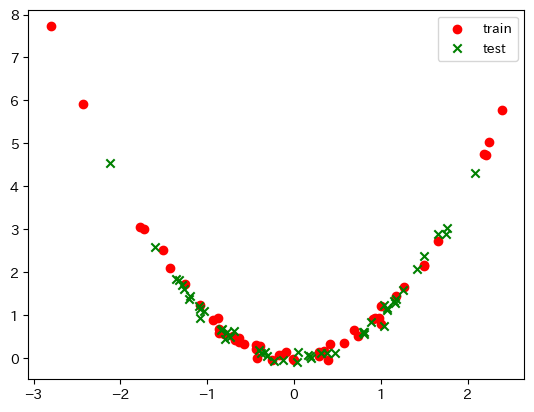

In [13]:
plt.scatter(x_train, y_train, c='r', label='train')
plt.scatter(x_test, y_test, c='g', marker='x', label='test')
plt.legend()

In [14]:
from torch import nn

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        relu = nn.ReLU(inplace=True)
        # これがレイヤー関数
        self.net = nn.Sequential(
            nn.Linear(n_input, M),
            relu,
            nn.Linear(M, n_output),
            relu,
        )
    def forward(self, x):
        return self.net(x)

net = Net(1, 1)

outputs = net(x_train)


In [15]:
#for param in net.named_parameters():
#    print(param)

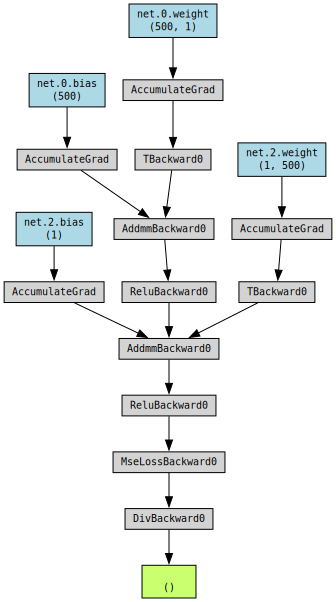

In [16]:
criterion = nn.MSELoss().float()

loss = criterion(outputs, y_train) / 2.0

from torchviz import make_dot
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)


In [17]:
loss.backward()

In [18]:
import torch.optim as optim

lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

optimizer.step()
optimizer.zero_grad()

In [19]:
num_epochs = 1000

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 200 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.5f}')


Epoch / Loss = 0 / 2.34109
Epoch / Loss = 200 / 1.33445
Epoch / Loss = 400 / 1.33228
Epoch / Loss = 600 / 1.32976
Epoch / Loss = 800 / 1.32823


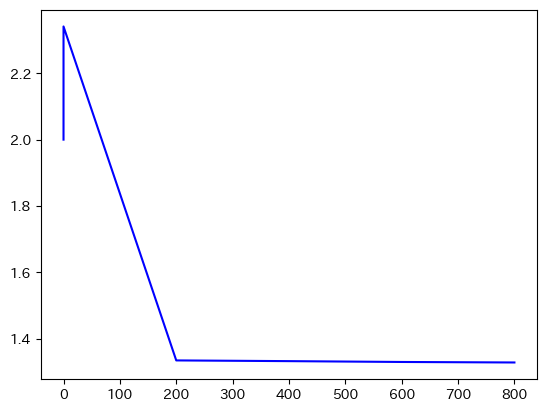

In [20]:
plt.plot(history[:, 0], history[:, 1], 'b')

## 教師データとの比較

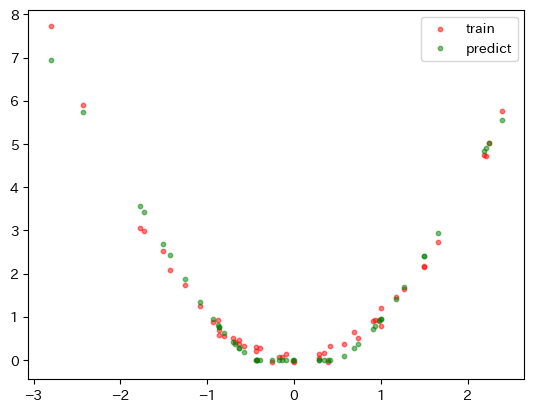

In [21]:
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='r', s=10, label='train', alpha=0.5)
plt.scatter(x_train.data.numpy(), net(x_train).data.numpy(), c='g', s=10, label='predict', alpha=0.5)
plt.legend()

## テストデータとの比較（未知入力に対する結果）

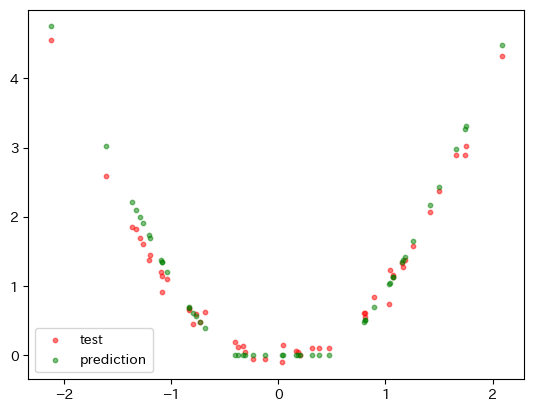

In [22]:
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='r', s=10, label='test', alpha=0.5)
plt.scatter(x_test.data.numpy(), net(x_test).data.numpy(), c='g', s=10, label='prediction', alpha=0.5)
plt.legend()